In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image,display
from tensorflow.keras.models import load_model

In [2]:
model=load_model(filepath="F:\Freshness\dataset\m.h5",compile=False)
# Make sure to compile your model before predicting
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
class_labels=['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']

In [6]:
image_path="banana.jpeg"

Attempting to load the image from: F:\Freshness\dataset\rb.jpeg


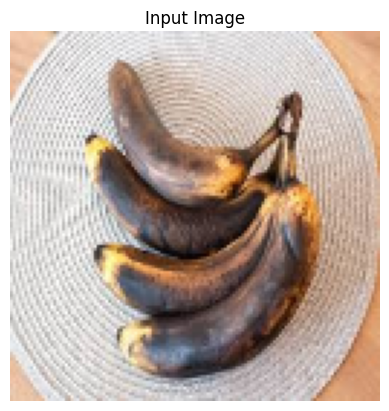

In [24]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the image path
image_path = r"F:\Freshness\dataset\rb.jpeg"  # Use a raw string for Windows paths

# Check if the path exists
if not os.path.exists(image_path):
    print(f"Error: The file at path '{image_path}' does not exist.")
else:
    # Try loading the image
    print(f"Attempting to load the image from: {image_path}")
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image at {image_path}. Please check the file format and path.")
    else:
        # Convert to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Resize the image to 180x180
        image = cv2.resize(image, (128, 128))
        
        # Display the image using matplotlib
        plt.imshow(image)
        plt.title("Input Image")
        plt.axis('off')
        plt.show()


In [25]:
image=np.array(image)
image=image/255.0
image=np.expand_dims(image,axis=0)
print(image.shape)

(1, 128, 128, 3)


In [27]:
# Ensure the input image shape matches the model input shape
print("Input image shape:", image.shape)
print("Model expected input shape:", model.input_shape)


Input image shape: (1, 128, 128, 3)
Model expected input shape: (None, 128, 128, 3)


In [28]:
model_prediction = model.predict(image)
model_class = np.argmax(model_prediction[0])
model_label = class_labels[model_class]
fruit_name = model_label.split(" ")[0]
print(f"Fruit classified as -> {fruit_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Fruit classified as -> stale_banana


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define paths to your test dataset directory
test_dir = 'F:\Freshness\dataset'

# Prepare the test dataset using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale images to [0, 1]
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Match the input size of your model
    batch_size=32,           # Batch size, adjust as needed
    class_mode='categorical',# Assuming categorical labels
    shuffle=False            # Do not shuffle to match predictions with labels accurately
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 1560 images belonging to 2 classes.


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 12)